In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv("amazon_prime_data.csv")

In [5]:
df.shape

(9668, 12)

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [10]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,9668,9668,9668,7585,8435,672,155,9668.000000,9331,9668,9668,9668
unique,9668,2,9668,5773,7927,86,84,NaN,24,219,518,9414
top,s1,Movie,The Grand Seduction,Mark Knight,Maggie Binkley,United States,"March 30, 2021",NaN,13+,1 Season,Drama,"Arpo was designed as a commando robot, built a..."
freq,1,7814,1,113,56,253,14,NaN,2117,1342,986,15
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.341849,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.922482,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1920.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [11]:
df.describe(include ="object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,9668,9668,9668,7585,8435,672,155,9331,9668,9668,9668
unique,9668,2,9668,5773,7927,86,84,24,219,518,9414
top,s1,Movie,The Grand Seduction,Mark Knight,Maggie Binkley,United States,"March 30, 2021",13+,1 Season,Drama,"Arpo was designed as a commando robot, built a..."
freq,1,7814,1,113,56,253,14,2117,1342,986,15


In [12]:
# Handle missing values
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64


In [18]:
# Check for duplicate values
df.duplicated().sum()

0

In [30]:
# Filling missing values using fillna()
object_features=df.select_dtypes('object').columns
for feature in df.columns:
    if feature in object_features:
        df[feature]=df[feature].fillna('Not Available')


In [32]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [27]:
print(df.describe())

       release_year
count   9668.000000
mean    2008.341849
std       18.922482
min     1920.000000
25%     2007.000000
50%     2016.000000
75%     2019.000000
max     2021.000000


In [ ]:
Exploratory Data Analysis

In [46]:
# Filter the data to include only movies
movies_df = df[df['type'] == 'Movie']

# Count the number of movies by country
country_counts = movies_df['country'].value_counts()

# Get the top 10 countries with the most films
top_10_countries = country_counts.head(10)

print(top_10_countries)

country
Not Available                    7245
India                             213
United States                     194
United Kingdom                     24
Canada                             16
United Kingdom, United States       9
United States, United Kingdom       6
Italy                               6
India, United States                5
Canada, United States               5
Name: count, dtype: int64


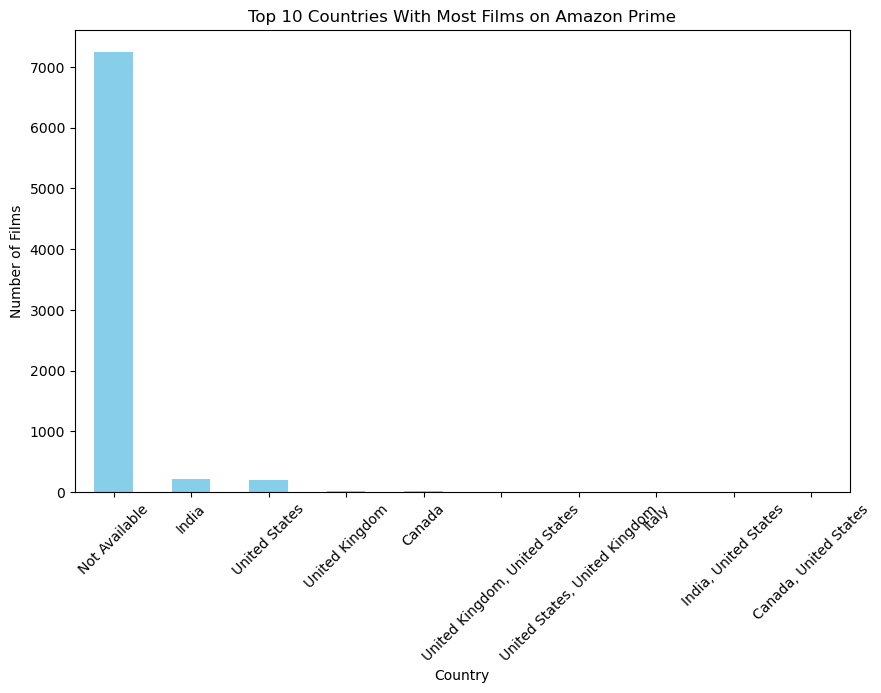

In [86]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries With Most Films on Amazon Prime')
plt.xlabel('Country')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()

In [64]:
df['rating'].value_counts()

rating
13+              2117
16+              1547
ALL              1268
18+              1243
R                1010
PG-13             393
7+                385
Not Available     337
PG                253
NR                223
TV-14             208
TV-PG             169
TV-NR             105
G                  93
TV-G               81
TV-MA              77
TV-Y               74
TV-Y7              39
UNRATED            33
NC-17               3
AGES_18_            3
NOT_RATE            3
AGES_16_            2
16                  1
ALL_AGES            1
Name: count, dtype: int64

<Axes: xlabel='release_year'>

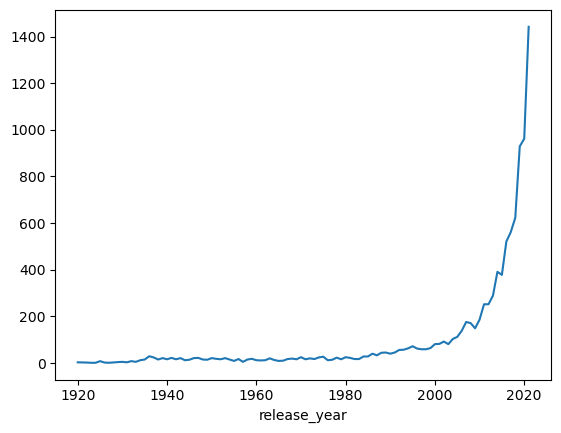

In [66]:
df.groupby('release_year').count()['show_id'].plot(kind='line')

In [76]:
# Trying to clean duration column as it has two entries min & season/seasons
df['duration'].unique()

array(['113 min', '110 min', '74 min', '69 min', '45 min', '52 min',
       '98 min', '131 min', '87 min', '92 min', '88 min', '93 min',
       '94 min', '46 min', '96 min', '1 Season', '104 min', '62 min',
       '50 min', '3 Seasons', '2 Seasons', '86 min', '36 min', '37 min',
       '103 min', '9 min', '18 min', '14 min', '20 min', '19 min',
       '22 min', '60 min', '6 min', '54 min', '5 min', '84 min',
       '126 min', '125 min', '109 min', '89 min', '85 min', '56 min',
       '40 min', '111 min', '33 min', '34 min', '95 min', '99 min',
       '78 min', '4 Seasons', '77 min', '55 min', '53 min', '115 min',
       '58 min', '49 min', '135 min', '91 min', '64 min', '59 min',
       '48 min', '122 min', '90 min', '102 min', '65 min', '114 min',
       '136 min', '70 min', '138 min', '100 min', '480 min', '4 min',
       '30 min', '152 min', '68 min', '57 min', '7 Seasons', '31 min',
       '151 min', '149 min', '9 Seasons', '141 min', '121 min', '79 min',
       '140 min', '51 min'

In [80]:
df['duration']=df['duration'].str.replace('Seasons','Season')

In [82]:
df['duration'].unique()

array(['113 min', '110 min', '74 min', '69 min', '45 min', '52 min',
       '98 min', '131 min', '87 min', '92 min', '88 min', '93 min',
       '94 min', '46 min', '96 min', '1 Season', '104 min', '62 min',
       '50 min', '3 Season', '2 Season', '86 min', '36 min', '37 min',
       '103 min', '9 min', '18 min', '14 min', '20 min', '19 min',
       '22 min', '60 min', '6 min', '54 min', '5 min', '84 min',
       '126 min', '125 min', '109 min', '89 min', '85 min', '56 min',
       '40 min', '111 min', '33 min', '34 min', '95 min', '99 min',
       '78 min', '4 Season', '77 min', '55 min', '53 min', '115 min',
       '58 min', '49 min', '135 min', '91 min', '64 min', '59 min',
       '48 min', '122 min', '90 min', '102 min', '65 min', '114 min',
       '136 min', '70 min', '138 min', '100 min', '480 min', '4 min',
       '30 min', '152 min', '68 min', '57 min', '7 Season', '31 min',
       '151 min', '149 min', '9 Season', '141 min', '121 min', '79 min',
       '140 min', '51 min', '10